# Classification MNIST

In this notebook, we will compare the performance of a few classification algorithms, using the popular MNIST dataset.  We will look at:
- Logistic regression
- Support vector machine
- Neural network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)


In [3]:
X, y = mnist["data"], mnist["target"]

In [4]:
y = pd.to_numeric(y)

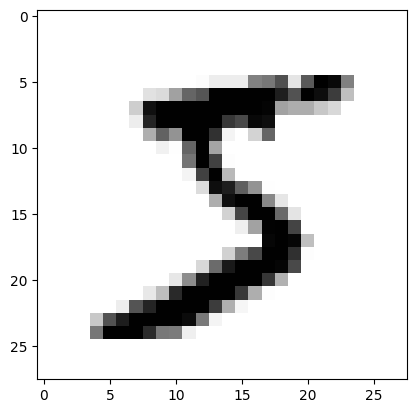

In [5]:
plt.imshow(X.iloc[0].values.reshape(28,28), cmap="binary")

In [6]:
from sklearn.preprocessing import StandardScaler
X_prepared = StandardScaler().fit_transform(X)

In [7]:
X_train, X_valid, X_test, y_train, y_valid, y_test = X_prepared[:40000], X_prepared[40000:60000], X_prepared[60000:], y[:40000], y[40000:60000], y[60000:]

## Logistic regression

In [8]:
from sklearn.linear_model import SGDClassifier

logit = SGDClassifier(loss='log_loss', random_state=42)
logit.fit(X_train, y_train)
y_train_pred_logit = logit.predict(X_train)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_train, y_train_pred_logit))
conf_mx_logit = confusion_matrix(y_train, y_train_pred_logit)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3924
           1       0.97      0.95      0.96      4563
           2       0.93      0.89      0.91      3943
           3       0.93      0.87      0.90      4081
           4       0.94      0.91      0.93      3909
           5       0.90      0.84      0.87      3604
           6       0.96      0.94      0.95      3975
           7       0.96      0.92      0.94      4125
           8       0.70      0.94      0.80      3860
           9       0.91      0.88      0.90      4016

    accuracy                           0.91     40000
   macro avg       0.92      0.91      0.91     40000
weighted avg       0.92      0.91      0.91     40000



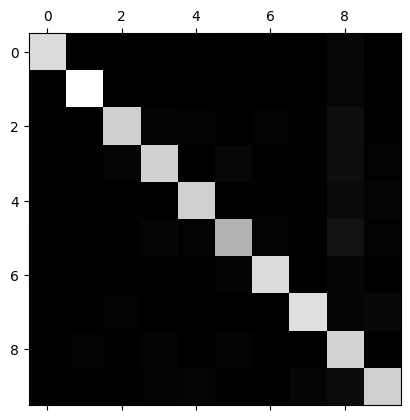

In [10]:
plt.matshow(conf_mx_logit, cmap=plt.cm.gray)

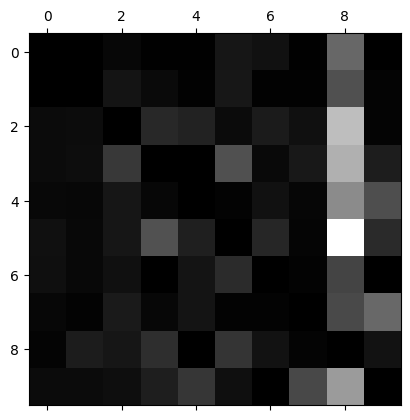

In [11]:
row_sums = conf_mx_logit.sum(axis=1, keepdims=True)  # count of true values for each digit
conf_mx_norm_logit = conf_mx_logit / row_sums
np.fill_diagonal(conf_mx_norm_logit, 0)
plt.matshow(conf_mx_norm_logit, cmap=plt.cm.gray)

## Support Vector Machine

In [12]:
svm = SGDClassifier()
svm.fit(X_train, y_train)
y_train_pred_svm = svm.predict(X_train)

In [13]:
print(classification_report(y_train, y_train_pred_svm))
conf_mx_svm = confusion_matrix(y_train, y_train_pred_svm)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3924
           1       0.97      0.95      0.96      4563
           2       0.93      0.89      0.91      3943
           3       0.93      0.88      0.90      4081
           4       0.95      0.91      0.93      3909
           5       0.90      0.85      0.88      3604
           6       0.96      0.95      0.95      3975
           7       0.96      0.92      0.94      4125
           8       0.71      0.94      0.81      3860
           9       0.91      0.88      0.90      4016

    accuracy                           0.91     40000
   macro avg       0.92      0.91      0.91     40000
weighted avg       0.92      0.91      0.91     40000



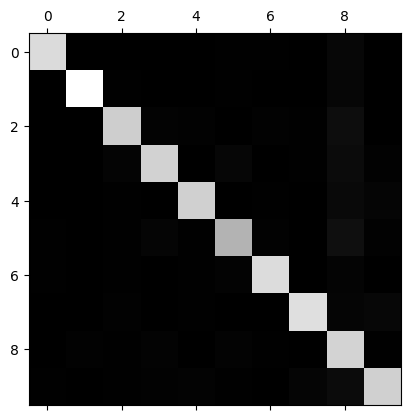

In [14]:
plt.matshow(conf_mx_svm, cmap=plt.cm.gray)

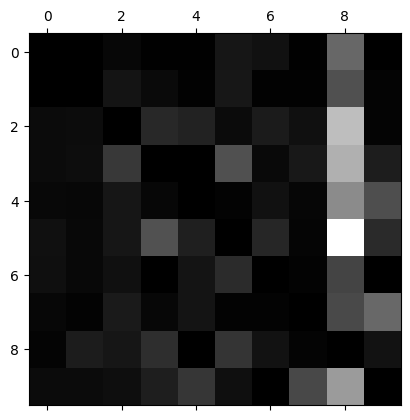

In [15]:
conf_mx_norm_logit = conf_mx_logit / row_sums
np.fill_diagonal(conf_mx_norm_logit, 0)
plt.matshow(conf_mx_norm_logit, cmap=plt.cm.gray)

## Multi Layer Perceptron

In [16]:
import tensorflow as tf
from tensorflow import keras

nn = keras.models.Sequential([
# keras.layers.Flatten(input_shape=[784,]),
keras.layers.Dense(300, activation='relu', input_shape=(784,)),
keras.layers.Dense(100, activation='relu'),
keras.layers.Dense(10, activation='softmax')
])

2025-05-01 16:51:36.844514: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-01 16:51:36.855288: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746132696.862144   38982 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746132696.864195   38982 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746132696.869663   38982 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [17]:
nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
nn.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])

In [19]:
history = nn.fit(X_train, y_train, epochs=10,
                 validation_data = (X_valid, y_valid))

Epoch 1/10


I0000 00:00:1746132698.950137   39197 service.cc:152] XLA service 0x7d8af8003160 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746132698.950151   39197 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4070, Compute Capability 8.9
2025-05-01 16:51:38.957339: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746132698.980743   39197 cuda_dnn.cc:529] Loaded cuDNN version 90800
2025-05-01 16:51:39.564914: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_33', 196 bytes spill stores, 196 bytes spill loads

2025-05-01 16:51:39.567502: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_33_0'

 238/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.5613 - loss: 1.4256

I0000 00:00:1746132701.050291   39197 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7757 - loss: 0.7746 - val_accuracy: 0.9270 - val_loss: 0.2572
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9401 - loss: 0.2082 - val_accuracy: 0.9416 - val_loss: 0.2079
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9579 - loss: 0.1490 - val_accuracy: 0.9475 - val_loss: 0.1864
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9650 - loss: 0.1203 - val_accuracy: 0.9520 - val_loss: 0.1744
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9724 - loss: 0.0969 - val_accuracy: 0.9543 - val_loss: 0.1669
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9778 - loss: 0.0817 - val_accuracy: 0.9570 - val_loss: 0.1620
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9829 - loss: 0.0689 - val_accuracy: 0.9585 - val_loss: 0.1549
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9864 - loss: 0.0569 - val_accurac

In [20]:
# Get class probabilities (shape: [n_samples, 10])
y_train_probs_nn = nn.predict(X_train)

# Convert to class labels (0 to 9)
y_train_pred_nn = np.argmax(y_train_probs_nn, axis=1)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 364us/step


In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_train, y_train_pred_nn))
conf_mx_nn = confusion_matrix(y_train, y_train_pred_nn)
accuracy_score(y_train, y_train_pred_nn)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3924
           1       0.99      1.00      0.99      4563
           2       0.99      0.99      0.99      3943
           3       0.99      0.99      0.99      4081
           4       0.99      0.99      0.99      3909
           5       0.99      0.99      0.99      3604
           6       0.99      0.99      0.99      3975
           7       0.99      0.99      0.99      4125
           8       0.99      0.99      0.99      3860
           9       0.99      0.98      0.99      4016

    accuracy                           0.99     40000
   macro avg       0.99      0.99      0.99     40000
weighted avg       0.99      0.99      0.99     40000



0.991775

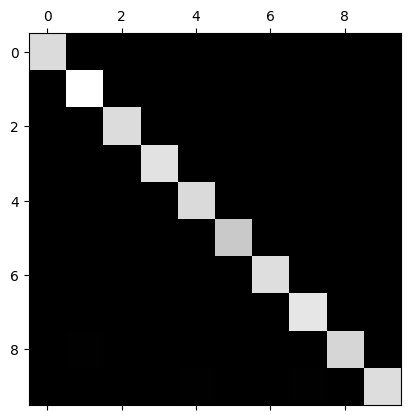

In [22]:
plt.matshow(conf_mx_nn, cmap=plt.cm.gray)

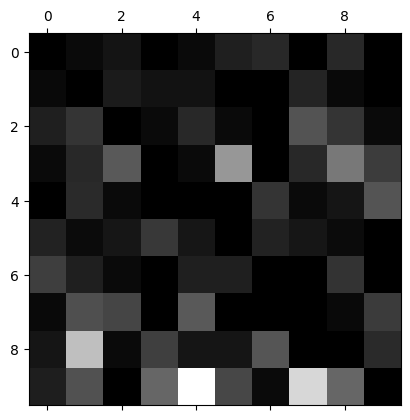

In [23]:
row_sums = conf_mx_nn.sum(axis=1, keepdims=True)  # count of true values for each digit
conf_mx_norm_nn = conf_mx_nn / row_sums
np.fill_diagonal(conf_mx_norm_nn, 0)
plt.matshow(conf_mx_norm_nn, cmap=plt.cm.gray)

## Evaluate on the test set

In [24]:
# Logistic regression
y_test_pred_logit = logit.predict(X_test)
print(classification_report(y_test, y_test_pred_logit))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       980
           1       0.98      0.96      0.97      1135
           2       0.94      0.87      0.90      1032
           3       0.92      0.88      0.90      1010
           4       0.94      0.90      0.92       982
           5       0.90      0.81      0.85       892
           6       0.94      0.92      0.93       958
           7       0.95      0.90      0.92      1028
           8       0.67      0.93      0.77       974
           9       0.90      0.86      0.88      1009

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [25]:
# SVM
y_test_pred_svm = svm.predict(X_test)
print(classification_report(y_test, y_test_pred_svm))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       980
           1       0.98      0.96      0.97      1135
           2       0.93      0.88      0.90      1032
           3       0.91      0.88      0.89      1010
           4       0.94      0.90      0.92       982
           5       0.90      0.82      0.86       892
           6       0.94      0.92      0.93       958
           7       0.95      0.90      0.93      1028
           8       0.68      0.92      0.78       974
           9       0.90      0.86      0.88      1009

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [26]:
## MLP
y_test_probs_nn = nn.predict(X_test)
y_test_pred_nn = np.argmax(y_test_probs_nn, axis=1)
print(classification_report(y_test, y_test_pred_nn))

292/313 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step

2025-05-01 16:52:00.273161: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_16', 108 bytes spill stores, 108 bytes spill loads

2025-05-01 16:52:00.418220: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_16', 808 bytes spill stores, 852 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.95      0.97      0.96      1032
           3       0.96      0.97      0.97      1010
           4       0.96      0.97      0.96       982
           5       0.96      0.96      0.96       892
           6       0.98      0.97      0.97       958
           7       0.96      0.96      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.97      0.93      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.96      0.96     10000
weighted avg       0.97      0.97      0.97     10000



From the test set evaluation results, Multi Layer Perceptron is a clear winner over Logistic Regression and SVM in this task.